/home/kcosta/miniconda3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DataBatch(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34], batch=[34], ptr=[2])


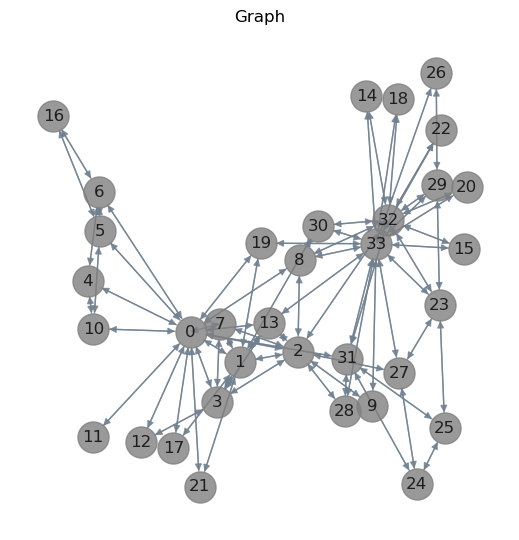

In [1]:
import sys
sys.path.append("../")

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from torch_geometric.utils import scatter
from graphtoviz.datasets import read_data
from graphtoviz.plots import plot_graph, plot_centrality, plot_adjacency_matrix


loader = read_data("KarateClub")

for data in loader:
    print(data)
    x = scatter(data.x, data.batch, dim=0, reduce='mean')
    x.size()

g = plot_graph(data, with_labels=True, node_size=500)

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

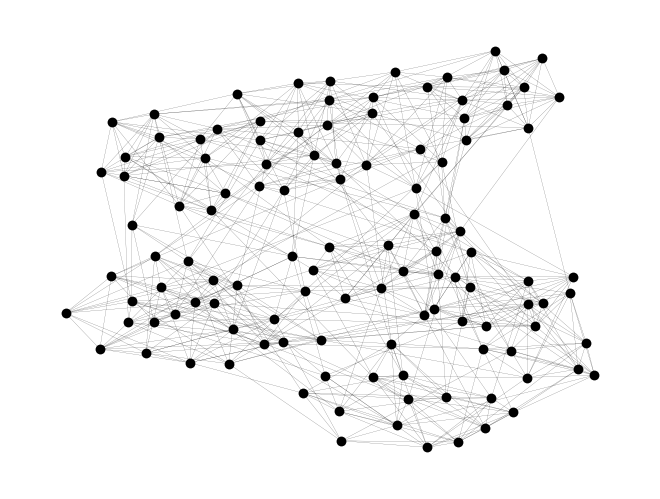

In [7]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

print(txt)
# print degree for each team - number of games
for n, d in G.degree():
    print(f"{n:20} {d:2}")

options = {"node_color": "black", "node_size": 50, "linewidths": 0, "width": 0.1}

pos = nx.spring_layout(G, seed=1969)  # Seed for reproducible layout
nx.draw(G, pos, **options)
plt.show()

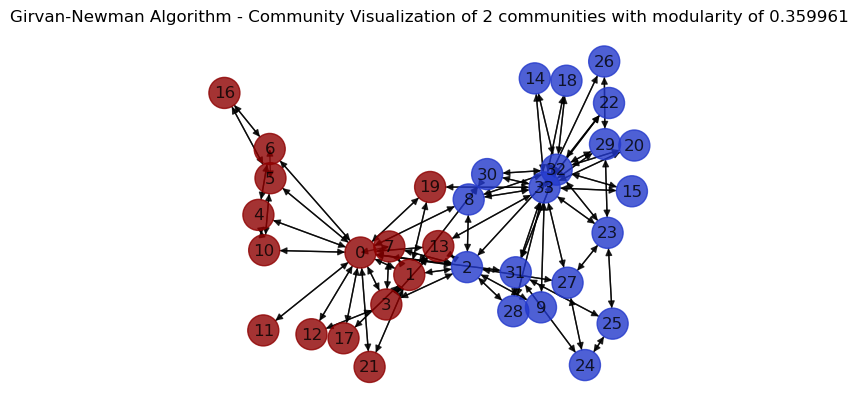

In [6]:
import pandas as pd
import torch_geometric
G = torch_geometric.utils.to_networkx(data)
communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#8e0000", "#2238cb", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Girvan-Newman Algorithm - Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        alpha = 0.8, 
        node_size=500,
        node_color=node_colors,
        with_labels=True,
        font_size=12,
        font_color="black",
    )

visualize_communities(G, communities[0], 1)

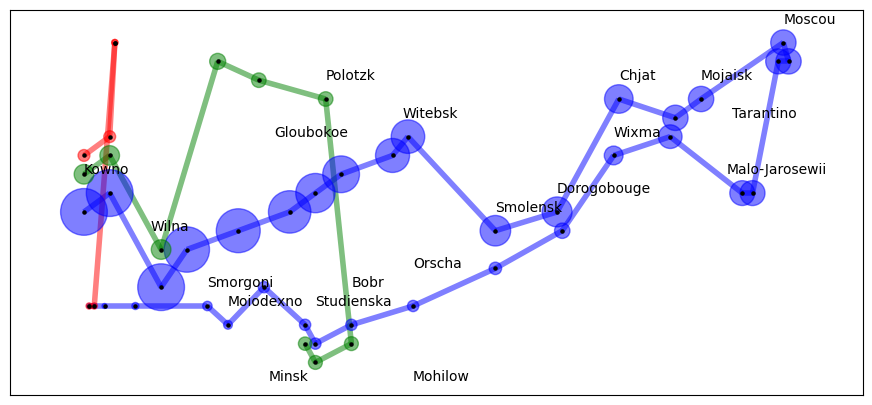

In [6]:
import matplotlib.pyplot as plt
import networkx as nx


def minard_graph():
    data1 = """\
24.0,54.9,340000,A,1
24.5,55.0,340000,A,1
25.5,54.5,340000,A,1
26.0,54.7,320000,A,1
27.0,54.8,300000,A,1
28.0,54.9,280000,A,1
28.5,55.0,240000,A,1
29.0,55.1,210000,A,1
30.0,55.2,180000,A,1
30.3,55.3,175000,A,1
32.0,54.8,145000,A,1
33.2,54.9,140000,A,1
34.4,55.5,127100,A,1
35.5,55.4,100000,A,1
36.0,55.5,100000,A,1
37.6,55.8,100000,A,1
37.7,55.7,100000,R,1
37.5,55.7,98000,R,1
37.0,55.0,97000,R,1
36.8,55.0,96000,R,1
35.4,55.3,87000,R,1
34.3,55.2,55000,R,1
33.3,54.8,37000,R,1
32.0,54.6,24000,R,1
30.4,54.4,20000,R,1
29.2,54.3,20000,R,1
28.5,54.2,20000,R,1
28.3,54.3,20000,R,1
27.5,54.5,20000,R,1
26.8,54.3,12000,R,1
26.4,54.4,14000,R,1
25.0,54.4,8000,R,1
24.4,54.4,4000,R,1
24.2,54.4,4000,R,1
24.1,54.4,4000,R,1"""
    data2 = """\
24.0,55.1,60000,A,2
24.5,55.2,60000,A,2
25.5,54.7,60000,A,2
26.6,55.7,40000,A,2
27.4,55.6,33000,A,2
28.7,55.5,33000,R,2
29.2,54.2,30000,R,2
28.5,54.1,30000,R,2
28.3,54.2,28000,R,2"""
    data3 = """\
24.0,55.2,22000,A,3
24.5,55.3,22000,A,3
24.6,55.8,6000,A,3
24.6,55.8,6000,R,3
24.2,54.4,6000,R,3
24.1,54.4,6000,R,3"""
    cities = """\
24.0,55.0,Kowno
25.3,54.7,Wilna
26.4,54.4,Smorgoni
26.8,54.3,Moiodexno
27.7,55.2,Gloubokoe
27.6,53.9,Minsk
28.5,54.3,Studienska
28.7,55.5,Polotzk
29.2,54.4,Bobr
30.2,55.3,Witebsk
30.4,54.5,Orscha
30.4,53.9,Mohilow
32.0,54.8,Smolensk
33.2,54.9,Dorogobouge
34.3,55.2,Wixma
34.4,55.5,Chjat
36.0,55.5,Mojaisk
37.6,55.8,Moscou
36.6,55.3,Tarantino
36.5,55.0,Malo-Jarosewii"""

    c = {}
    for line in cities.split("\n"):
        x, y, name = line.split(",")
        c[name] = (float(x), float(y))

    g = []

    for data in [data1, data2, data3]:
        G = nx.Graph()
        i = 0
        G.pos = {}  # location
        G.pop = {}  # size
        last = None
        for line in data.split("\n"):
            x, y, p, r, n = line.split(",")
            G.pos[i] = (float(x), float(y))
            G.pop[i] = int(p)
            if last is None:
                last = i
            else:
                G.add_edge(i, last, **{r: int(n)})
                last = i
            i = i + 1
        g.append(G)

    return g, c


(g, city) = minard_graph()

plt.figure(1, figsize=(11, 5))
plt.clf()
colors = ["b", "g", "r"]
for G in g:
    c = colors.pop(0)
    node_size = [G.pop[n] // 300 for n in G]
    nx.draw_networkx_edges(G, G.pos, edge_color=c, width=4, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=node_size, node_color=c, alpha=0.5)
    nx.draw_networkx_nodes(G, G.pos, node_size=5, node_color="k")

for c in city:
    x, y = city[c]
    plt.text(x, y + 0.1, c)
plt.show()

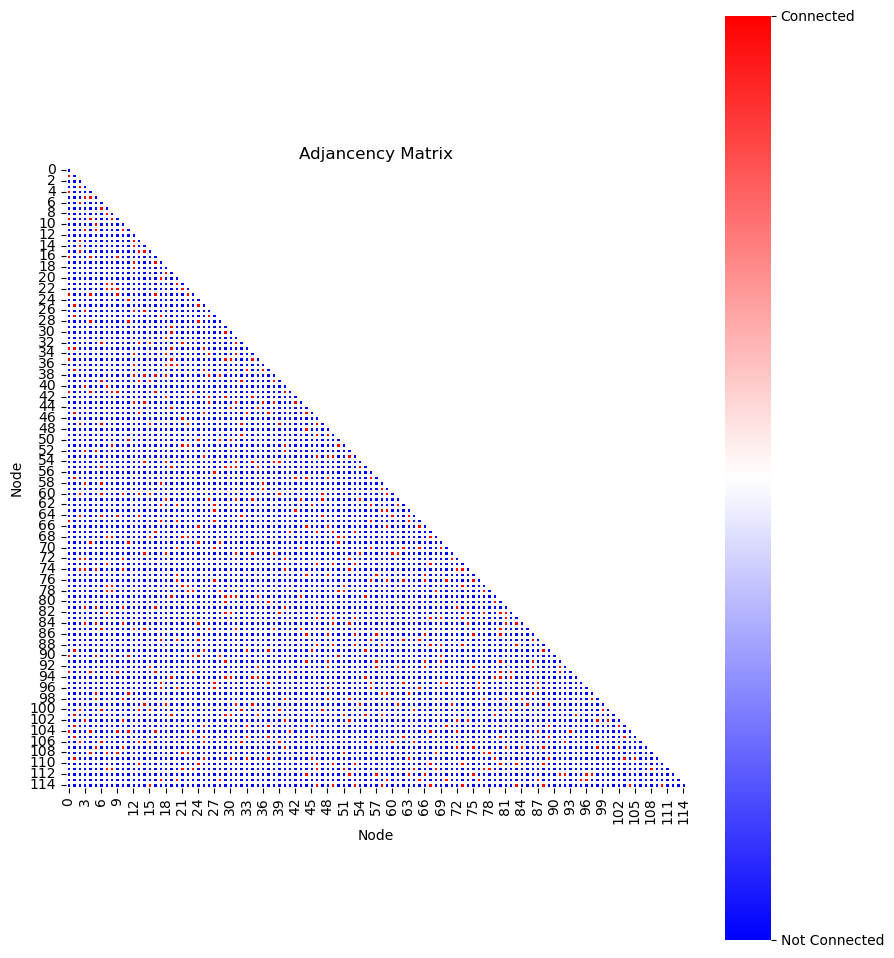

In [9]:
import urllib.request
import io
import zipfile

import matplotlib.pyplot as plt
import networkx as nx

url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"

sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data
plot_adjacency_matrix(G)

In [8]:
plot_centrality(G, "Degree")

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 1000 iterations')

In [4]:
import networkx as nx
import torch_geometric
a = torch_geometric.utils.to_networkx(data[0])
b = nx.betweenness_centrality(a)

import pandas as pd
b = pd.DataFrame(b.items(), columns=['node', 'betweenness']).sort_values(by='betweenness', ascending=False).head(10).reset_index(drop=True)

In [5]:
METRICS = {
    "Degree of Centrality": nx.degree_centrality,
    "Betweenness Centrality": nx.betweenness_centrality,
    "Closeness Centrality": nx.closeness_centrality,
    "Eigenvector Centrality": nx.eigenvector_centrality,
    "Katz Centrality": nx.katz_centrality,
    "Pagerank": nx.pagerank,
    "Harmonic Centrality": nx.harmonic_centrality,
    "Edge Betweenness Centrality": nx.edge_betweenness_centrality,
}

m = {}
o = pd.DataFrame()
for metric in METRICS:
    b = pd.DataFrame(METRICS[metric](a).items(), columns=['node', 'metric']).sort_values(by='metric', ascending=False).head(10).reset_index(drop=True)
    m[metric] = b
    o = pd.concat([o, b['node']], axis=1)
    o.columns = m.keys()

In [22]:
from graphtoviz.metrics import summary_metrics
metrics = summary_metrics(data)

# dict to dataframe
import pandas as pd
pd.DataFrame.from_dict(metrics['Degree'], orient='index', columns=['De']).sort_values(by='Degree of Centrality', ascending=False).head(10)

,Degree of Centrality
33,1.030303
0,0.969697
32,0.727273
2,0.606061
1,0.545455
3,0.363636
31,0.363636
23,0.303030
8,0.303030
13,0.303030


In [7]:
# calculate overlap between metrics
import numpy as np
overlap = np.zeros((len(METRICS), len(METRICS)))
for i, m1 in enumerate(m):
    for j, m2 in enumerate(m):
        overlap[i, j] = len(set(m[m1]['node']) & set(m[m2]['node']))
overlap = pd.DataFrame(overlap, columns=m.keys(), index=m.keys())

overlap

,Degree of Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,Katz Centrality,Pagerank,Harmonic Centrality,Edge Betweenness Centrality
Degree of Centrality,10.0,8.0,9.0,9.0,9.0,10.0,9.0,0.0
Betweenness Centrality,8.0,10.0,9.0,8.0,8.0,8.0,9.0,0.0
Closeness Centrality,9.0,9.0,10.0,9.0,9.0,9.0,10.0,0.0
Eigenvector Centrality,9.0,8.0,9.0,10.0,10.0,9.0,9.0,0.0
Katz Centrality,9.0,8.0,9.0,10.0,10.0,9.0,9.0,0.0
Pagerank,10.0,8.0,9.0,9.0,9.0,10.0,9.0,0.0
Harmonic Centrality,9.0,9.0,10.0,9.0,9.0,9.0,10.0,0.0
Edge Betweenness Centrality,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


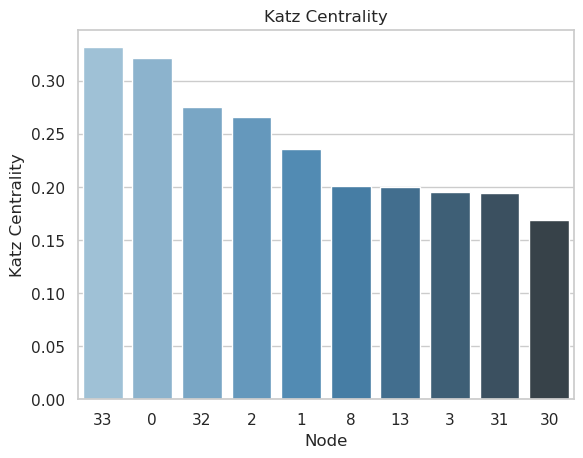

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

select = 'Katz Centrality'
s = m[select]

sns.set(style="whitegrid")
# plot in order of betweenness centrality descending
ax = sns.barplot(y="metric", x="node", data=s, palette="Blues_d", order=s['node'])
ax.set_title(f'{select}')
ax.set_ylabel(f'{select}')
ax.set_xlabel('Node')
plt.show()


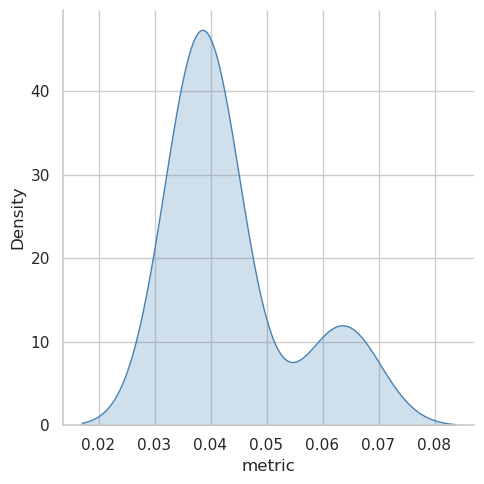

In [9]:
ax = sns.displot(b, x="metric", kind='kde', fill=True, color = 'steelblue')
plt.show()